In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests
import json

In [2]:
file = "/Users/deankleto/Desktop/Project_4/blkjckhands.csv"


BlackJack = pd.read_csv(file)
df1 = pd.DataFrame(BlackJack)
df1 = df1[["PlayerNo","winloss"]]
df1 = df1.rename(columns={"PlayerNo": "SeatNumber",
                                 "winloss": "WinLoss"})

df1.head()

,SeatNumber,WinLoss
0,Player1,Loss
1,Player2,Win
2,Player3,Loss
3,Player4,Loss
4,Player5,Loss


In [3]:
# df2 = df1.sort_values('WinLoss')
# df2.head()

In [4]:
# location_df = df2['WinLoss'].apply(lambda x: pd.Series(x.split('Loss')))
# location_df.head()

In [7]:
# pd.DataFrame(group.describe().rename(columns={'score':name}).squeeze()
#                          for name, group in df1.groupby('name'))

In [8]:
df2 = df1.groupby(['SeatNumber']).describe().unstack(0)
df3=df2.transpose()
#print(df2)
#df3 = df2.describe()
df3_f=df3.transpose()
df3_f[['WinLoss']]

                 SeatNumber
WinLoss  count   Player1       150000
                 Player2       150000
                 Player3       150000
                 Player4       150000
                 Player5       150000
                 Player6       150000
         unique  Player1            3
                 Player2            3
                 Player3            3
                 Player4            3
                 Player5            3
                 Player6            3
         top     Player1         Loss
                 Player2         Loss
                 Player3         Loss
                 Player4         Loss
                 Player5         Loss
                 Player6         Loss
         freq    Player1        71506
                 Player2        71701
                 Player3        71869
                 Player4        71748
                 Player5        71663
                 Player6        71334
dtype: object

In [9]:
print(df3[['WinLoss']])

                 SeatNumber
WinLoss  count   Player1       150000
                 Player2       150000
                 Player3       150000
                 Player4       150000
                 Player5       150000
                 Player6       150000
         unique  Player1            3
                 Player2            3
                 Player3            3
                 Player4            3
                 Player5            3
                 Player6            3
         top     Player1         Loss
                 Player2         Loss
                 Player3         Loss
                 Player4         Loss
                 Player5         Loss
                 Player6         Loss
         freq    Player1        71506
                 Player2        71701
                 Player3        71869
                 Player4        71748
                 Player5        71663
                 Player6        71334
dtype: object


In [11]:
file = "/Users/deankleto/Desktop/Project_4/weighted_seat_rankings.csv"


rated_seats = pd.read_csv(file)
rated_seats = pd.DataFrame(rated_seats).sort_values('Weighted Count', ascending=False)
                           

rated_seats

,Seat Number,Weighted Count,Weighted Average
5,Seat 6,16,0.762
0,Seat 1,15,0.714
3,Seat 4,10,0.476
1,Seat 2,9,0.429
4,Seat 5,9,0.429
2,Seat 3,4,0.190


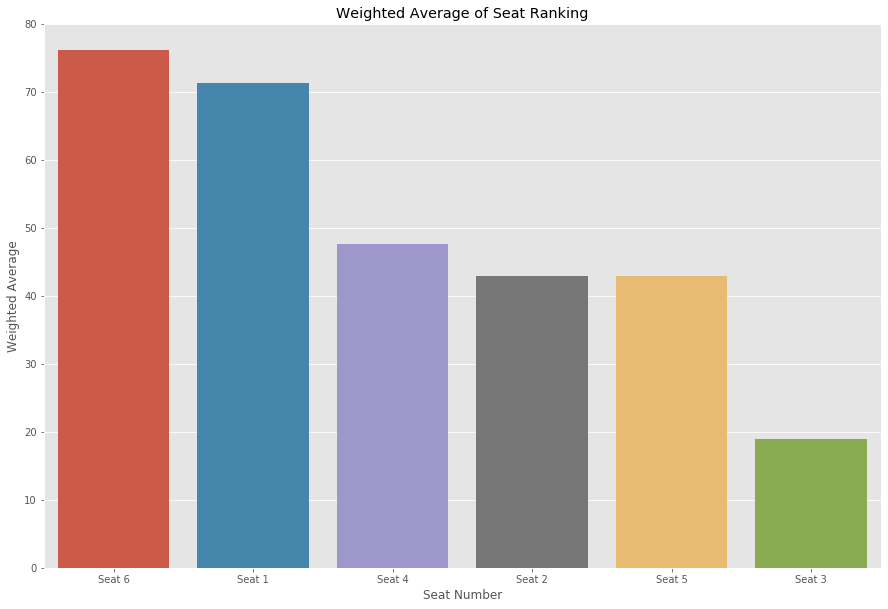

In [57]:
#Weighted Average Chart
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(15, 10))
plt.title("Weighted Average of Seat Ranking")


sns.barplot(x='Seat Number', y='Weighted Average', data=rated_seats, estimator=lambda x: sum(x)*100.0/len(x))

plt.savefig('Seat Averages.png')

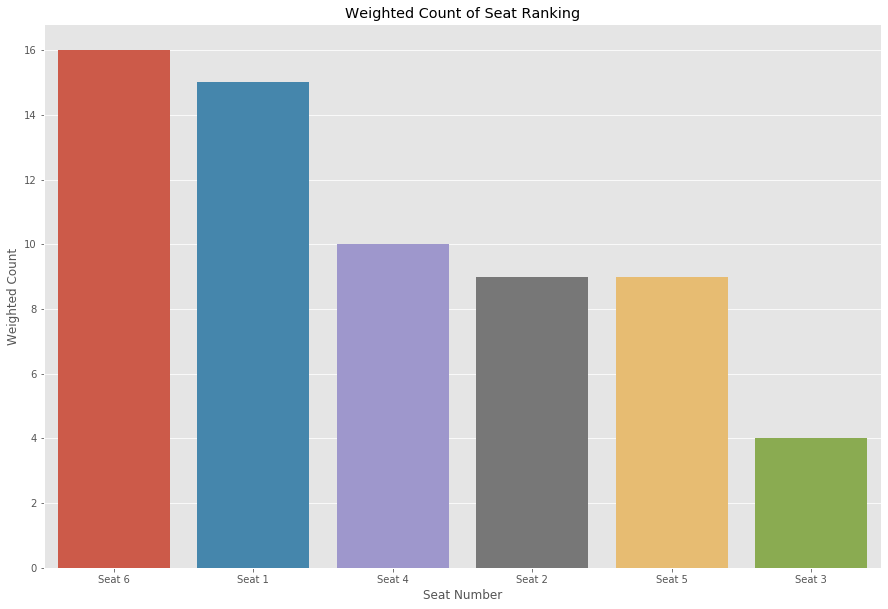

In [58]:
#Weighted Count Chart

plt.figure(figsize=(15, 10))
plt.title("Weighted Count of Seat Ranking")


sns.barplot(x='Seat Number', y='Weighted Count', data=rated_seats, estimator=lambda x: sum(x))

plt.savefig('Seat Counts.png')

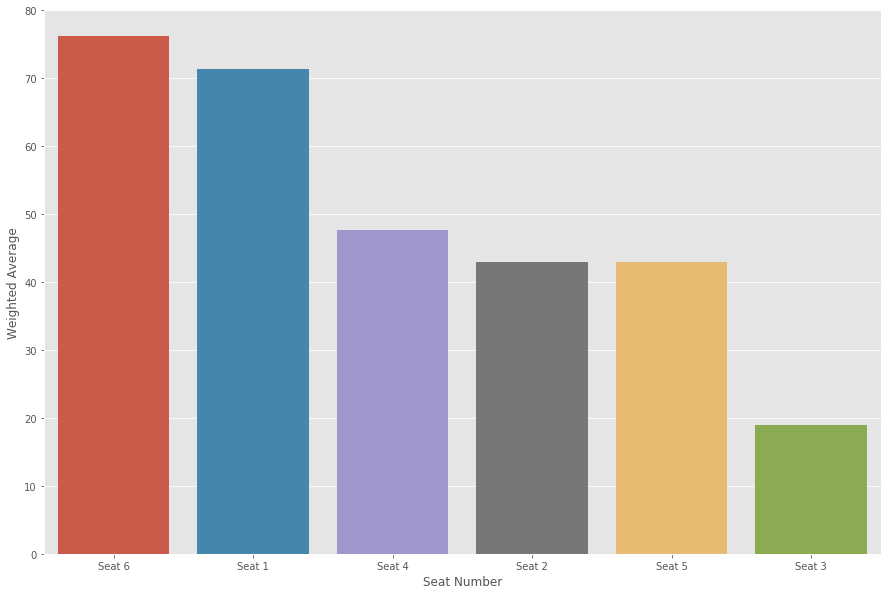

In [49]:
from matplotlib.pyplot import show
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(15, 10))
#ax.set_title("Weighted Averages", fontsize=18)

sns.barplot(x='Seat Number', y='Weighted Average', data=rated_seats, estimator=lambda x: sum(x)*100.0/len(x))
# total = float(len(rated_seats))
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,
#             height + 3,
#             '{:1.2f}'.format(height/total),
#             ha="center") 

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')    
    
show()




# sns.set(style="darkgrid")
# titanic = sns.load_dataset("titanic")
# total = float(len(titanic)) # one person per row 
# #ax = sns.barplot(x="class", hue="who", data=titanic)
# ax = sns.countplot(x="class", hue="who", data=titanic) # for Seaborn version 0.7 and more
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x()+p.get_width()/2.,
#             height + 3,
#             '{:1.2f}'.format(height/total),
#             ha="center") 
# show()

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# set jupyter's max row display
pd.set_option('display.max_row', 1000)

# set jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

# Load the dataset
data = pd.read_csv(file)
data

,Seat Number,Weighted Count,Weighted Average
0,Seat 1,15,0.714
1,Seat 2,9,0.429
2,Seat 3,4,0.190
3,Seat 4,10,0.476
4,Seat 5,9,0.429
5,Seat 6,16,0.762


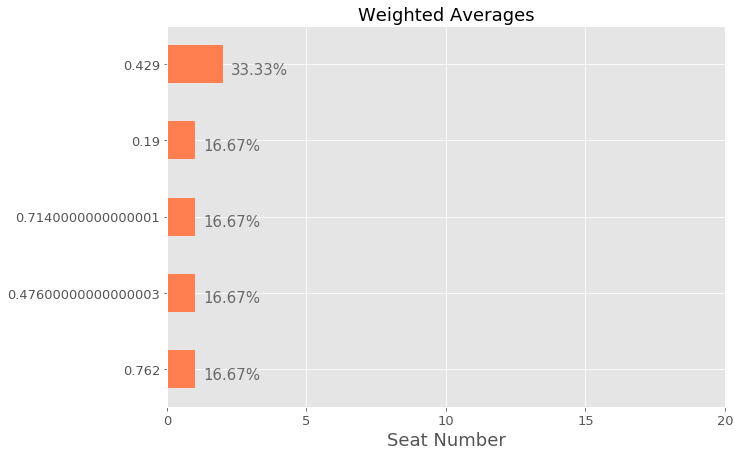

In [19]:
ax = data['Weighted Average'].value_counts().plot(kind='barh', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Weighted Averages", fontsize=18)
ax.set_xlabel("Seat Number", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

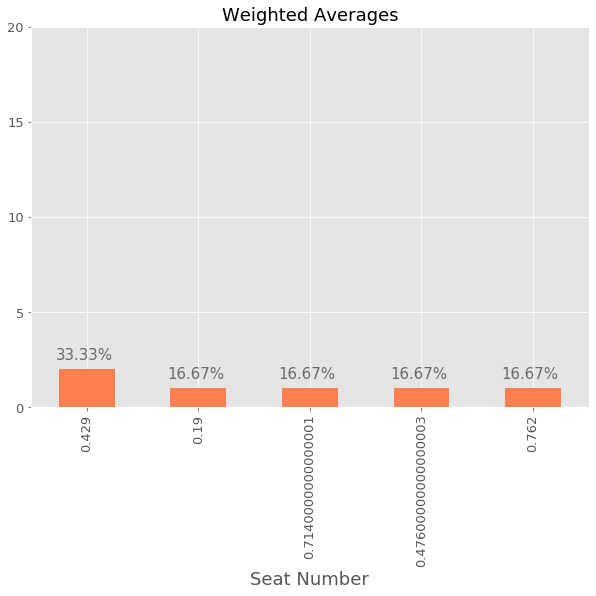

In [20]:
ax = data['Weighted Average'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Weighted Averages", fontsize=18)
ax.set_xlabel("Seat Number", fontsize=18);
ax.set_yticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

<Figure size 1080x720 with 0 Axes>

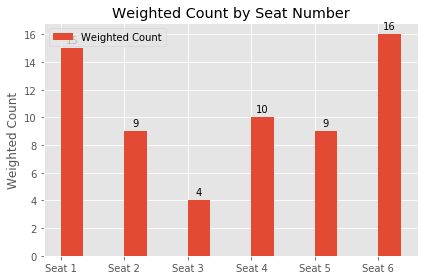

In [38]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Seat 1', 'Seat 2', 'Seat 3', 'Seat 4', 'Seat 5', 'Seat 6']
# seat = [1, 2, 3, 4, 5, 6]
weight = [15, 9, 4, 10, 9, 16]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(15, 10))
# precp_df.plot.line(figsize=(12,8), rot=45, color='purple')
fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, seat, width, label='Seat Number')
rects2 = ax.bar(x + width/2, weight, width, label='Weighted Count')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weighted Count')
ax.set_title('Weighted Count by Seat Number')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# autolabel(rects1)
autolabel(rects2)

fig.tight_layout()



plt.show()

In [ ]:
# plot1 = rated_seats[['Seat Number','Weighted Count']].plot(kind='bar', title ="Weighted Count", figsize=(15, 10), legend=True, fontsize=12)
# plot1.set_xlabel("Seat Number", fontsize=12)
# plot1.set_ylabel("Weighted Count", fontsize=12)
# plt.show()

In [ ]:
# df2 = df1.groupby(['Seat Number'])
# print(df2)
# df2 = pd.DataFrame({'key1': [df1.groupby(['Seat Number'])]})
# df3 = pd.DataFrame({'key2': [df2.describe()]})
# df3

In [ ]:
# plot2 = rated_seats[['Seat Number','Weighted Average']].plot(kind='bar', title ="Weighted Average", figsize=(15, 10), legend=True, fontsize=12)
# plot2.set_xlabel("Seat Number", fontsize=12)
# plot2.set_ylabel("Weighted Average", fontsize=12)
# plt.show()